In [25]:
import torch
from diffusers import DDPMPipeline, UNet2DModel
from scheduling_rectflow import RectFlowScheduler
import matplotlib.pyplot as plt
import os

# Load the trained model and scheduler
model_dir = "./output/test"
unet = UNet2DModel.from_pretrained(f"{model_dir}/unet")
scheduler_config_path = os.path.join(model_dir, "scheduler", "scheduler_config.json")
noise_scheduler = RectFlowScheduler.from_config(scheduler_config_path)
if torch.cuda.is_available():
    unet.to('cuda')

# Create the pipeline
pipeline = DDPMPipeline(
    unet=unet,
    scheduler=noise_scheduler,
)

100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.04it/s]


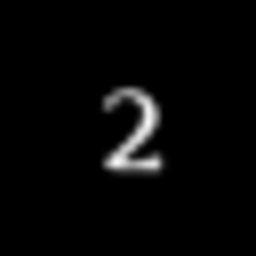

In [99]:
# Run the reverse diffusion process
generated_images = pipeline(num_inference_steps=50).images
generated_images[0].resize((256, 256))